# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

 Получение данных и общей информации о массиве данных:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = ',')
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


Получение 30 строк массива:

In [2]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Для корректного отображения данных потребовалась указать разделитель.
Строки таблицы содержат информацию о продаваемых квартирах, ее характеристики и расположение.
Из очевидных проблем:
1. Данные в массиве разного типа.(в связи с этим метод describe не позволил получить достаточно информации, так как он работает только с числовыми типами данных)
2. Имеются пропуски:
    в столбцах - описаниях квартир, которые заполнялись пользователями, это может говорить о том, что пользователь не владел достаточной информацией и заполнение полей не было обязательным.
    в столбцах полученных автоматически на основе картографических данных, это говорит о несовершенстве системы сбора информации, это необходимо сообщить разработчикам базы данных.

## Предобработка данных

### Обработка пропусков

Количество пропусков по столбцам:

In [3]:
print('Пропуски:') 
print()
print(data.isna().sum())

Пропуски:

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Обнаружены пропуски по столбцам:

    airports_nearest         
    cityCenters_nearest      
    parks_around3000         
    parks_nearest           
    ponds_around3000         
    ponds_nearest      
Данные заполнять не буду, они не требуются для дальнейшего исследования. 

По столбцам:

    ceiling_height
    floors_total 
    living_area
    is_apartment
    kitchen_area
    balcony


Остальные пропуски необходимо заполнить.
Для этого будут использованы медианные значения с группировкой по определенному признаку, это позволит повысить точность полученных значений.


По столбцу населенный пункт[locality_name] заполнить пропуски по среднему или медиане невозможно :)

Избавляемся от пропусков:

In [4]:
data.dropna(subset = ['locality_name'], inplace = True) 

Заполню пропуски по столбцу "высота потолка", сгруппировала данные по количеству комнат в квартире, пропуски заполнила медианным значением по группе

In [5]:
data['ceiling_height'] = data['ceiling_height'].astype('float')
mediana_ceiling_height = data.groupby(['rooms']).agg({'ceiling_height': 'median'}).rename(columns = {'ceiling_height':'median_ceiling_height'})
data = data.merge(mediana_ceiling_height, on = ['rooms'])
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data.loc[data['ceiling_height'].isna(), 'median_ceiling_height']
#после группировки осталось не заполнено одно значение, его удаляю
data.dropna(subset = ['ceiling_height'], inplace = True) 


Пропуски в столбце "количество этажей", также заполнены медианным значение, с группировкой по этажу, на котором расположена квартира, ряд значений получится дробным, они будут заменены в следующем блоке на целочисленные

In [6]:
data['floors_total'] = data['floors_total'].astype('float')
mediana_floors_total = data.groupby(['floor']).agg({'floors_total': 'median'}).rename(columns = {'floors_total':'median_floors_total'})
data = data.merge(mediana_floors_total, on = ['floor'])
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'median_floors_total']
data['floors_total'] = data['floors_total'].astype('int')

In [7]:
data.query('floors_total < floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_ceiling_height,median_floors_total


Таких значений нет :)

Столбец "Балконы", если значение пропущено, скорее всего, их нет, заменяем пропущенные значения на 0

In [8]:
data['balcony'] = data['balcony'].fillna(0)

Данные по апартаментам: если значение пропущено, скорее всего, это не апартаменты, заменяем пропущенные значения на false


In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски по столбцу "жилая площадь", сгруппировала данные по количеству комнат в квартире, пропуски заполнила медианным значением по группе


In [10]:
data['total_area'] = data['total_area'].astype('float')
mediana_total_area = data.groupby(['rooms']).agg({'total_area': 'median'}).rename(columns = {'total_area':'median_total_area'})
data = data.merge(mediana_total_area, on = ['rooms'])
data.loc[data['total_area'].isna(), 'total_area'] = data.loc[data['total_area'].isna(), 'median_total_area']

Пропуски по столбцу "площадь кухни", в квартирах-студиях = 0, заполним пропуски в площади кухни, если квартира-студия


In [11]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0

Оставшиеся пропуски в площади кухни заполню медианным значением, с группировкой по количеству комнат в квартире


In [12]:
data['kitchen_area'] = data['kitchen_area'].astype('float')
mediana_kitchen_area = data.groupby(['rooms']).agg({'kitchen_area': 'median'}).rename(columns = {'kitchen_area':'median_kitchen_area'})
data = data.merge(mediana_kitchen_area, on = ['rooms'])
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'median_kitchen_area']

Пропуски по столбцу "жилая площадь", сгруппировала данные по количеству комнат в квартире, пропуски заполнила медианным значением по группе


In [13]:
data['living_area'] = data['living_area'].astype('float')
mediana_living_area = data.groupby(['rooms']).agg({'living_area': 'median'}).rename(columns = {'living_area':'median_living_area'})
data = data.merge(mediana_living_area, on = ['rooms'])
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'median_living_area']

In [14]:
print('Пропуски после обработки:')
print()
print(data.isna().sum())

Пропуски после обработки:

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5534
cityCenters_nearest       5511
parks_around3000          5510
parks_nearest            15585
ponds_around3000          5510
ponds_nearest            14565
days_exposition           3180
median_ceiling_height        0
median_floors_total          0
median_total_area            0
median_kitchen_area          0
median_living_area           0
dtype: int64


### Изменение типов данных

Тип данных был изменен перед заполнением пропусков по столбцам:

    Высота потолка
    Количество этажей
    Общая площадь
    Площадь кухни
    Жилая площадь
    Количество дней, которое объявление было размещено

Заменим типы данных по оставшимся столбцам:

Цена на момент снятия с публикации для дальнейших расчетов из типа object на float











In [15]:
data['last_price'] = data['last_price'].astype('float')

Дата публикации переведена в формат даты


In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Количество балконов - всегда целое число :) 
    перевожу в int


In [17]:
data['balcony'] = pd.to_numeric(data['balcony']) 
data['balcony'] = data['balcony'].astype('int')

Расстояние до центра перевожу в float:

In [18]:
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest']) 
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')

Количество дней, которое объявление было размещено перевожу в int

In [19]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23648
Data columns (total 27 columns):
total_images             23649 non-null int64
last_price               23649 non-null float64
total_area               23649 non-null float64
first_day_exposition     23649 non-null datetime64[ns]
rooms                    23649 non-null int64
ceiling_height           23649 non-null float64
floors_total             23649 non-null int64
living_area              23649 non-null float64
floor                    23649 non-null int64
is_apartment             23649 non-null bool
studio                   23649 non-null bool
open_plan                23649 non-null bool
kitchen_area             23649 non-null float64
balcony                  23649 non-null int64
locality_name            23649 non-null object
airports_nearest         18115 non-null object
cityCenters_nearest      18138 non-null float64
parks_around3000         18139 non-null object
parks_nearest            8064 non-null obj

### Обработка дубликатов

В поле населенный пункт очень много одинаковых названий, записанных по-разному, например, "посЕлок" и "посЁлок", а также встречается "поселок городского типа"

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Всеволожск', 'Колпино', 'Ломоносов',
       'посёлок Шушары', 'Гатчина', 'посёлок Металлострой',
       'посёлок Мурино', 'Выборг', 'Красное Село', 'Пушкин',
       'посёлок Парголово', 'Сертолово', 'Кронштадт', 'Тосно',
       'Никольское', 'Кировск', 'Сосновый Бор',
       'поселок городского типа Кузьмоловский',
       'поселок городского типа имени Свердлова',
       'садовое товарищество Приладожский', 'деревня Кудрово', 'Тихвин',
       'Петергоф', 'деревня Куттузи', 'Отрадное', 'Коммунар',
       'Светогорск', 'городской посёлок Янино-1', 'Сестрорецк', 'Кудрово',
       'Кингисепп', 'посёлок городского типа имени Свердлова',
       'деревня Новое Девяткино', 'деревня Старая', 'Кириши',
       'посёлок Бугры', 'деревня Фёдоровское', 'посёлок Новый Свет',
       'посёлок Молодёжное', 'Волосово', 'Подпорожье',
       'посёлок городского типа Токсово', 'Сланцы',
       'деревня Малое Карлино', 'посёлок Стрельна', 'посёлок Ропша',
       'поселок городского

In [24]:

#заменю "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
#заменю "поселок городского типа" на "поселок"
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex=True)
#удалю "поселок" из названия населенного пункта
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex=True)

data['locality_name'].unique()

array(['Санкт-Петербург', 'Всеволожск', 'Колпино', 'Ломоносов', 'Шушары',
       'Гатчина', 'Металлострой', 'Мурино', 'Выборг', 'Красное Село',
       'Пушкин', 'Парголово', 'Сертолово', 'Кронштадт', 'Тосно',
       'Никольское', 'Кировск', 'Сосновый Бор', 'Кузьмоловский',
       'имени Свердлова', 'садовое товарищество Приладожский',
       'деревня Кудрово', 'Тихвин', 'Петергоф', 'деревня Куттузи',
       'Отрадное', 'Коммунар', 'Светогорск', 'городской Янино-1',
       'Сестрорецк', 'Кудрово', 'Кингисепп', 'деревня Новое Девяткино',
       'деревня Старая', 'Кириши', 'Бугры', 'деревня Федоровское',
       'Новый Свет', 'Молодежное', 'Волосово', 'Подпорожье', 'Токсово',
       'Сланцы', 'деревня Малое Карлино', 'Стрельна', 'Ропша',
       'Никольский', 'городской Назия', 'Приозерск', 'Синявино',
       'Зеленогорск', 'Луга', 'Рощино', 'деревня Бегуницы',
       'деревня Кривко', 'Мыза-Ивановка', 'Житково', 'Павловск',
       'станции Вещево', 'Шлиссельбург', 'Волхов', 'Рахья', 'Пикал

**Выводы:**

1. Обработаны необходимые пропущенные значения.
2. Изменены типы данных.


## Расчёты и добавление результатов в таблицу

Добавляю столбец со стоимостью квадратного метра квартиры:


In [23]:
data['price_meter'] = data['last_price'] / data['total_area']

Добавляю столбцы с днем недели, месяцем, годом продажи


In [24]:
data['weekday_first_day'] = data['first_day_exposition'].dt.weekday
data['month_first_day'] = data['first_day_exposition'].dt.month
data['year_first_day'] = data['first_day_exposition'].dt.year

Столбец с категорией этажа:

In [25]:
def floor_category(row):
    
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

А также столбцы с соотношением площади кухни и жилой площади, к общей площади квартиры:

In [26]:
data['ratio_kitchen'] = data['kitchen_area'] / data['total_area']
data['ratio_living'] = data['living_area'] / data['total_area']

In [27]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,median_floors_total,median_total_area,median_kitchen_area,median_living_area,price_meter,weekday_first_day,month_first_day,year_first_day,ratio_kitchen,ratio_living
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18139.000000,20470.000000,23650.000000,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.684059,34.313891,5.893277,10.368791,0.591712,14197.860742,180.753200,8.466554,56.958458,9.262353,32.970364,9.943225e+04,2.568710,6.401564,2017.370021,0.186498,0.563852
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.597081,21.709506,4.883317,5.721927,0.959662,8606.830295,219.777916,5.231372,25.461690,1.782068,17.846085,5.033794e+04,1.788808,3.491418,1.037806,0.075773,0.110937
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,181.000000,1.000000,5.000000,26.050000,0.000000,17.600000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000,0.021583
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.400000,2.000000,7.200000,0.000000,9241.000000,45.000000,5.000000,36.530000,8.800000,17.600000,7.661497e+04,1.000000,3.000000,2017.000000,0.133121,0.490359
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,13105.000000,95.000000,5.000000,53.000000,9.000000,30.500000,9.500000e+04,3.000000,6.000000,2017.000000,0.172207,0.566598
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.700000,8.000000,11.500000,1.000000,16293.000000,231.000000,10.000000,72.900000,9.500000,45.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.232151,0.638298
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,65968.000000,1580.000000,36.000000,900.000000,112.000000,409.700000,1.907500e+06,6.000000,12.000000,2019.000000,0.787879,1.519048


## Исследовательский анализ данных

### Гистограммы 

Построим гистограммы по следующим параметрам: 

    площадь
    цена
    число комнат
    высота потолков

Гистограмма по общей площади квартир:



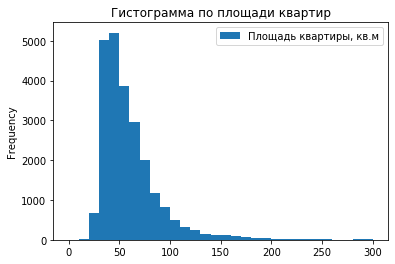

In [28]:
data.plot(kind = 'hist', y='total_area', title= 'Гистограмма по площади квартир', label = 'Площадь квартиры, кв.м', bins = 30, range = (0, 300))

Цена продажи квартиры

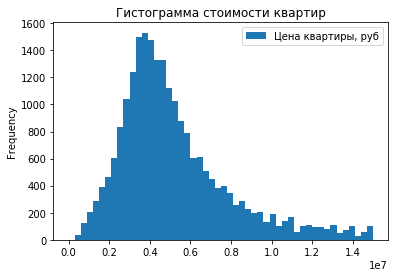

In [29]:
data.plot(kind = 'hist', y='last_price', title= 'Гистограмма стоимости квартир', label = 'Цена квартиры, руб', bins = 50,  range = (0, 15000000))

Гистограмма по числу комнат:

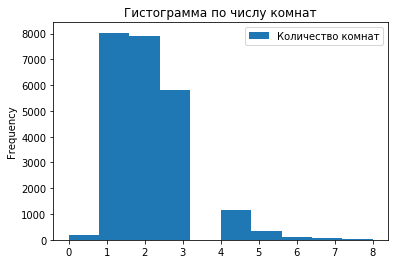

In [30]:
data.plot(kind = 'hist', y='rooms', title= 'Гистограмма по числу комнат', label = 'Количество комнат', bins = 10,  range = (0, 8))

Гистограмма высоты потолков

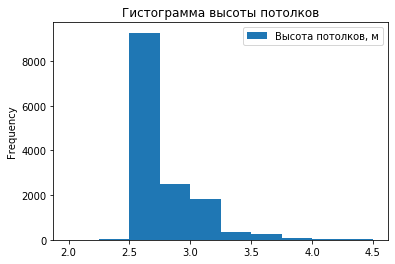

In [31]:
data.plot(kind = 'hist', y='ceiling_height', title= 'Гистограмма высоты потолков', label = 'Высота потолков, м', bins = 10,  range = (2, 4.5))

**Выводы:**

1. Гистограмма по общей площади квартиры имеет вид распределения Пуассона, основное количество объявлений содержит информацию о квартирах площадью около 50 кв. м., значения ниже 25 кв. м. будем считать аномальными.
2. Гистограмма стоимости квартиры имеет подозрительно маленькие значения, пик приходится примерно на 3,8 млн.
3. Из гистограммы по количеству комнат, можно сделать вывод, что чаще всего продают однокомнатный и двухкомнатные квартиры, немного реже трехкомнатные, выбиваются квартиры с количеством комнат 0.
4. Гистограмма по высоте потолков имеет пик около 2,7м, что является стандартной высотой при строительстве.

    


### Изучение времени продажи квартир

In [32]:
# Найдем медиану и среднее
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [33]:
data['days_exposition'].median()

95.0

Среднее значение 169 дней, медианное 95, это подтверждает наличие большого количества выбросов. 
Посмотрим подробнее.

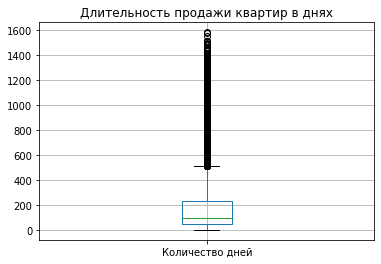

In [34]:
data.plot(kind = 'box', x='last_price', y='days_exposition', title= 'Длительность продажи квартир в днях', label = 'Количество дней', grid = True)

Из диаграммы можно сделать вывод о том, что чаще всего продажа идет около 100 дней.
Если квартира продается меньше 40 дней, можно считать продажу быстрой, если дольше 450 - долгой продажей.



### Работа с редкими и выбивающимися значениями

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,median_floors_total,median_total_area,median_kitchen_area,median_living_area,price_meter,weekday_first_day,month_first_day,year_first_day,ratio_kitchen,ratio_living
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18139.000000,20470.000000,23650.000000,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.684059,34.313891,5.893277,10.368791,0.591712,14197.860742,180.753200,8.466554,56.958458,9.262353,32.970364,9.943225e+04,2.568710,6.401564,2017.370021,0.186498,0.563852
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.597081,21.709506,4.883317,5.721927,0.959662,8606.830295,219.777916,5.231372,25.461690,1.782068,17.846085,5.033794e+04,1.788808,3.491418,1.037806,0.075773,0.110937
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,181.000000,1.000000,5.000000,26.050000,0.000000,17.600000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000,0.021583
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.400000,2.000000,7.200000,0.000000,9241.000000,45.000000,5.000000,36.530000,8.800000,17.600000,7.661497e+04,1.000000,3.000000,2017.000000,0.133121,0.490359
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,13105.000000,95.000000,5.000000,53.000000,9.000000,30.500000,9.500000e+04,3.000000,6.000000,2017.000000,0.172207,0.566598
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.700000,8.000000,11.500000,1.000000,16293.000000,231.000000,10.000000,72.900000,9.500000,45.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.232151,0.638298
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,65968.000000,1580.000000,36.000000,900.000000,112.000000,409.700000,1.907500e+06,6.000000,12.000000,2019.000000,0.787879,1.519048


Избавляюсь от выбросов по площади квартир использую данные СНиП

Минимальная площадь квартиры-студии - 24 кв. м.

Минимальная площадь жилой зоны - 12 кв. м.

Минимальная высота потолка - 2,4 м.



По количеству комнат отбрасываем данные со значением 0.

По количеству дней на продаже использую диапазон от 40 до 450 дней.



In [36]:
data = data.query('24 < total_area')
data = data.query('12 < living_area')
data = data.query('2.4 < ceiling_height')
data = data.query('0 < rooms')
data = data.query('40 < days_exposition < 450')
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_floors_total,median_total_area,median_kitchen_area,median_living_area,price_meter,weekday_first_day,month_first_day,year_first_day,floor_category,ratio_kitchen,ratio_living
1,16,14200000.0,121.00,2019-01-09,3,2.75,16,76.00,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,10.0,72.9,9.5,45.0,117355.371901,2,1,2019,другой,0.099174,0.628099
4,20,33000000.0,180.00,2017-02-17,3,2.90,9,86.00,8,False,False,False,24.0,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,10.0,72.9,9.5,45.0,183333.333333,4,2,2017,другой,0.133333,0.477778
5,20,4800000.0,65.90,2018-02-25,3,2.55,9,48.50,8,False,False,False,6.3,0,Санкт-Петербург,44855.0,17093.0,0.0,NaN,0.0,NaN,239.0,10.0,72.9,9.5,45.0,72837.632777,6,2,2018,другой,0.095599,0.735964
9,15,5900000.0,67.40,2019-01-11,3,2.50,9,48.50,8,False,False,False,6.2,0,Санкт-Петербург,47531.0,20410.0,0.0,NaN,0.0,NaN,95.0,10.0,72.9,9.5,45.0,87537.091988,4,1,2019,другой,0.091988,0.719585
12,0,4200000.0,57.86,2018-10-01,3,2.50,9,40.92,8,False,False,False,6.0,1,Колпино,25508.0,31294.0,1.0,61.0,0.0,NaN,45.0,10.0,72.9,9.5,45.0,72589.007950,0,10,2018,другой,0.103699,0.707224
13,8,6750000.0,67.20,2018-02-13,3,2.55,10,43.20,8,False,False,False,7.8,1,Санкт-Петербург,38510.0,9718.0,2.0,491.0,0.0,NaN,226.0,10.0,72.9,9.5,45.0,100446.428571,1,2,2018,другой,0.116071,0.642857
14,1,5700000.0,54.00,2017-12-04,3,2.55,9,45.00,8,False,False,False,9.5,0,Санкт-Петербург,32361.0,11829.0,1.0,470.0,0.0,NaN,146.0,10.0,72.9,9.5,45.0,105555.555556,0,12,2017,другой,0.175926,0.833333
15,8,4700000.0,61.30,2019-02-12,3,2.50,9,44.30,8,False,False,False,6.2,0,Ломоносов,46894.0,50319.0,0.0,NaN,1.0,642.0,53.0,10.0,72.9,9.5,45.0,76672.104405,1,2,2019,другой,0.101142,0.722675
19,19,6650000.0,70.00,2018-02-20,3,2.55,9,41.00,8,False,False,False,8.3,0,Санкт-Петербург,19546.0,21258.0,0.0,NaN,1.0,552.0,396.0,10.0,72.9,9.5,45.0,95000.000000,1,2,2018,другой,0.118571,0.585714
20,8,7490000.0,83.00,2017-11-28,3,2.55,10,48.00,8,False,False,False,11.0,0,Санкт-Петербург,23744.0,18283.0,1.0,35.0,1.0,773.0,71.0,10.0,72.9,9.5,45.0,90240.963855,1,11,2017,другой,0.132530,0.578313


### Изучение факторов, больше всего влияющих на стоимость квартир

Проверим зависит ли цена от площади квартиры, количества комнат и удалённости от центра. 

In [37]:
#построим матрицу корреляции и графики
data[['last_price','total_area','cityCenters_nearest','rooms']].corr()

,last_price,total_area,cityCenters_nearest,rooms
last_price,1.000000,0.718662,-0.200052,0.384010
total_area,0.718662,1.000000,-0.234968,0.757333
cityCenters_nearest,-0.200052,-0.234968,1.000000,-0.191137
rooms,0.384010,0.757333,-0.191137,1.000000


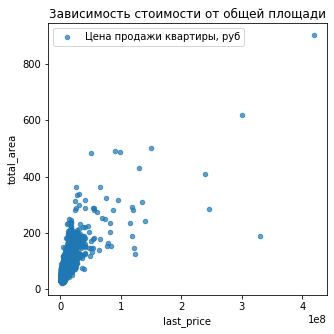

In [38]:
#зависимость стоимости от общей площади
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.7, figsize = (5, 5), title= '3ависимость стоимости от общей площади', label = 'Цена продажи квартиры, руб')

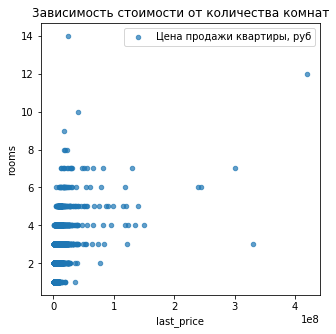

In [39]:
#зависимость стоимости от количества комнат
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.7, figsize = (5, 5), title = '3ависимость стоимости от количества комнат', label = 'Цена продажи квартиры, руб') 

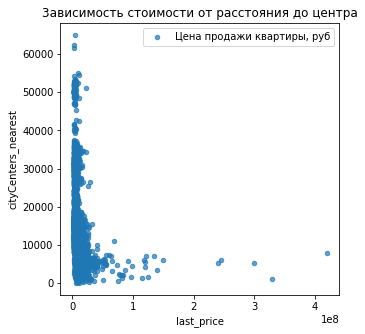

In [40]:
#зависимость стоимости от расстояния до центра
data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.7, figsize = (5, 5), title = '3ависимость стоимости от расстояния до центра',  label = 'Цена продажи квартиры, руб') 

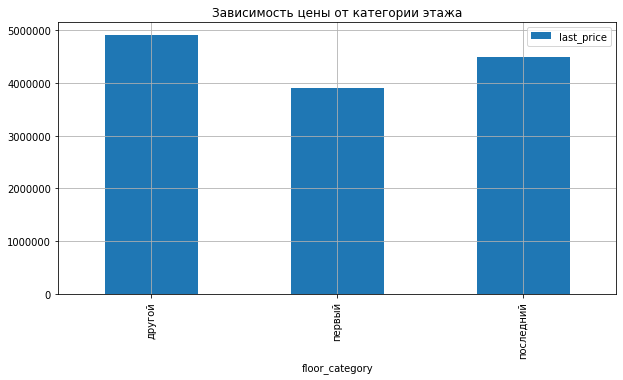

In [41]:
#зависимость цены от этажа
floor_price = data[['floor_category', 'last_price']].groupby(['floor_category']).median().plot(kind = 'bar', grid=True, figsize=(10, 5), title = 'Зависимость цены от категории этажа')


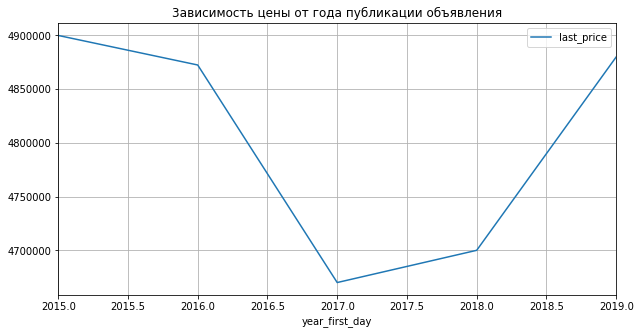

In [42]:
#зависимость цены от года публикации объявления
year_price = data[['year_first_day', 'last_price']].groupby(['year_first_day']).median().plot(grid=True, figsize=(10, 5), xlim=(2015,2019), title = '3ависимость цены от года публикации объявления')

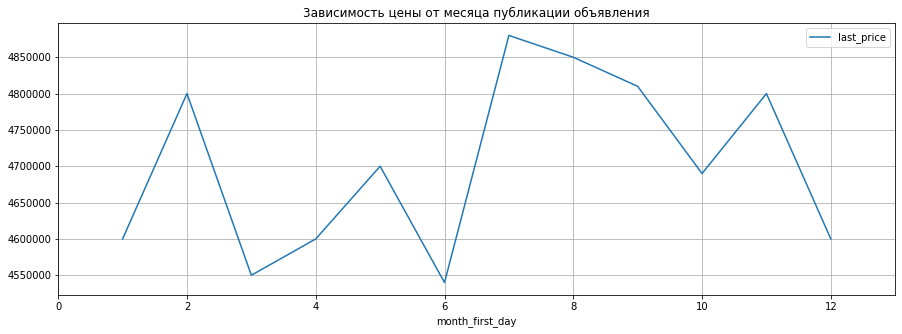

In [43]:
#зависимость цены от месяца публикации объявления
month_price = data[['month_first_day', 'last_price']].groupby(['month_first_day']).median().plot(grid=True, figsize=(15, 5), xlim=(0,13), title = '3ависимость цены от месяца публикации объявления')

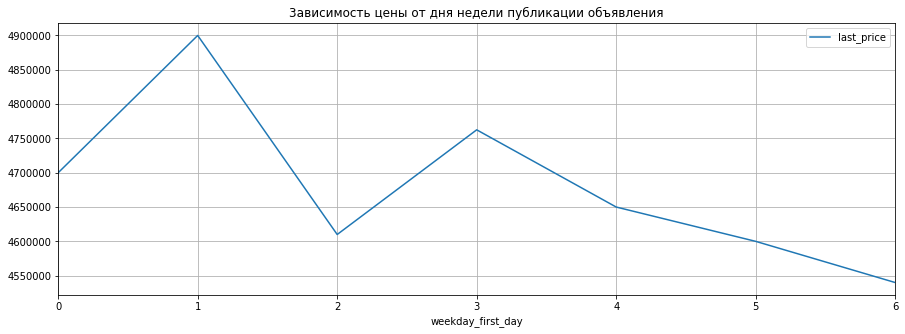

In [44]:
#зависимость цены от дня недели публикации объявления
weekday_price = data[['weekday_first_day', 'last_price']].groupby(['weekday_first_day']).median().plot(grid=True, figsize=(15, 5), xlim=(0,6), title = '3ависимость цены от дня недели публикации объявления')

**Выводы:**
1. Есть прямая зависимость стоимости квартиры от ее площади, но даже при одинаковой площади стоимость квартир может меняться, стоит проанализировать и другие параметры.
2. От количества комнат также есть зависимость, но менее явная, чем от общей площади - чем больше комнат, тем выше цена.
3. Чем дальше от центра города, тем в среднем квартира будет стоить дешевле
4. Квартиры на первом этаже самые дешевые. Дороже всех продаются квратиры расположенные на других этажах, но не первый или последний.
5. В 2015г. квартиры были самые дорогие, до 2017г. стоимость квартир падала, затем начала расти.
6. Дешевле всего купить квартиру в июне, самые дорогие в квартире в ноябре.

### Выбор 10 населённых пунктов с наибольшим числом объявлений. Средняя цена квадратного метра в этих населённых пунктах.

In [45]:
#Выделим 10 городов с наибольшим числом объявлений 
top_city = data['locality_name'].value_counts().sort_values(ascending=False).head(10).index
data_filtered = data.query('locality_name in @top_city')
data_filtered.groupby('locality_name')['price_meter'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург    112467.786911
Сестрорецк         102990.678224
Пушкин             102236.041305
Парголово           88558.980569
Мурино              85607.237573
Петергоф            83381.159102
Шушары              77286.418415
Колпино             73475.540972
Гатчина             69771.682721
Всеволожск          66086.238398
Name: price_meter, dtype: float64

**Вывод:**

Самые дорогие квартиры в Санкт-Петербурге, самые дешевые в Выборге, там цена на квартиры в два раза меньше, чем в Санкт-Петербурге.


### Определение центральной зоны по стоимости квартир в Санкт-Петербурге.

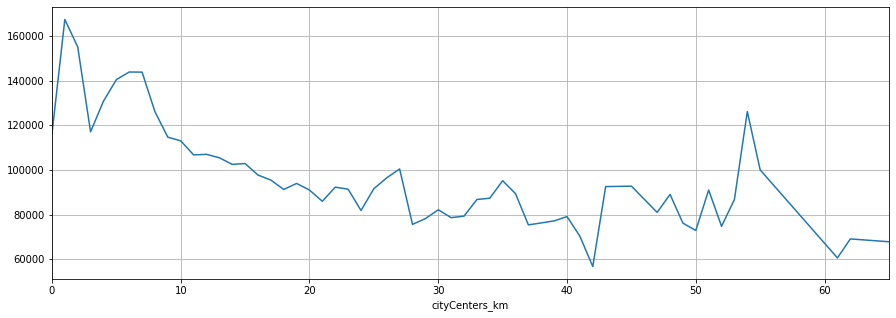

In [46]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()
data_centers = data.groupby('cityCenters_km')['price_meter'].mean()
data_centers.plot(x='cityCenters_km', y='price_meter', grid=True, figsize=(15, 5))

**Выводы:**

Цена начинает резко снижаться около 9 км,  эта область и является центральным районом.

### Анализ площади, цены, числа комнат, высоты потолков для центра Санкт-Петербурга. 

In [47]:
data_spb_center = data.query('cityCenters_km < 9 & locality_name == "Санкт-Петербург"')
print('Медианная площадь квартир в центре Санкт-Петербурге {:.2f}'.format(data_spb_center['total_area'].median()))
print('Медианная цена квартир в центре Санкт-Петербурге {:.2f}'.format(data_spb_center['last_price'].median()))
print('Медианная высота потолков в квартирах в центре Санкт-Петербурге {:.2f}'.format(data_spb_center['ceiling_height'].median()))
print('Наиболее часто встречаются квартиры со следующим количеством комнат в центре Санкт-Петербурге')
print(data_spb_center['rooms'].value_counts().head(3))

Медианная площадь квартир в центре Санкт-Петербурге 75.00
Медианная цена квартир в центре Санкт-Петербурге 8550000.00
Медианная высота потолков в квартирах в центре Санкт-Петербурге 3.00
Наиболее часто встречаются квартиры со следующим количеством комнат в центре Санкт-Петербурге
2    442
3    423
1    198
Name: rooms, dtype: int64


**Выводы:**

1. Медианная площадь квартир в центре города больше, примерно на 30 кв.м.
2. Квартиры в центре более дорогие, медианная стоимость составляет 9,2 млн, для остальных квартир эта стоимость равняется 4,5 миллионам.
3. Квартиры в центре также чаще двух- и трехкомнатные, в остальных случаях чаще встречаются однокомнатные.
4. Высота потолков отличается не сильно.

### Выделение факторов,  влияющих на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

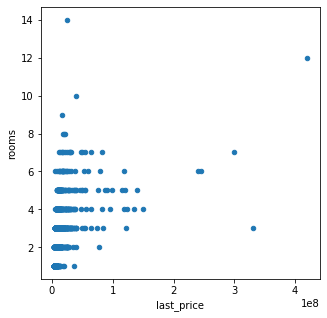

In [48]:
#зависимость стоимости от количества комнат
data_spb_center.plot(x='last_price', y='rooms', kind='scatter', alpha=1, figsize = (5, 5)) 

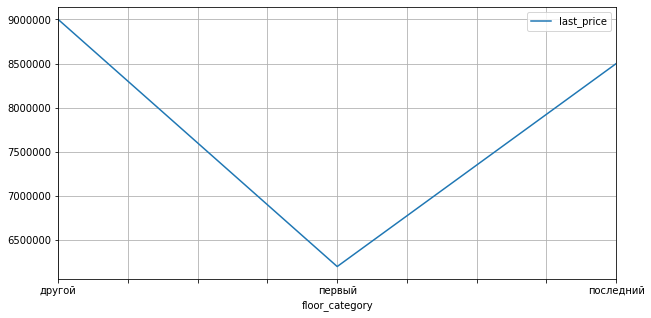

In [49]:
#зависимость цены от этажа
floor_price_center = data_spb_center[['floor_category', 'last_price']].groupby(['floor_category']).median().plot(grid=True, figsize=(10, 5))

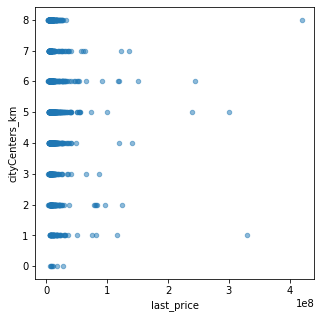

In [50]:
#зависимость стоимости от расстояния до центра
data_spb_center.plot(x='last_price', y='cityCenters_km', kind='scatter', alpha=0.5, figsize = (5, 5)) 

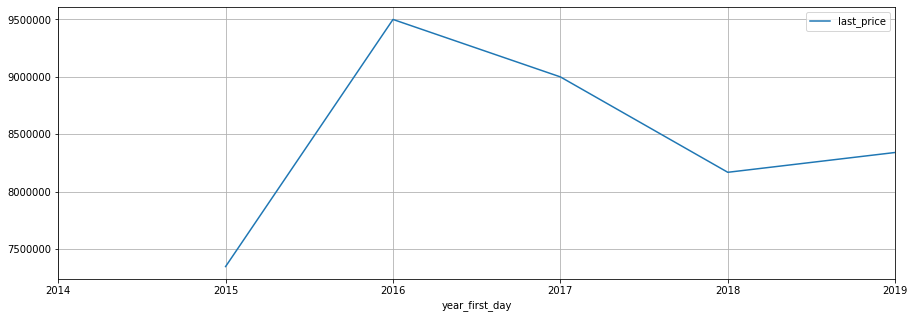

In [51]:
#зависимость цены от года публикации объявления
year_price_center = data_spb_center[['year_first_day', 'last_price']].groupby(['year_first_day']).median().plot(grid=True, figsize=(15, 5), xlim=(2014,2019))

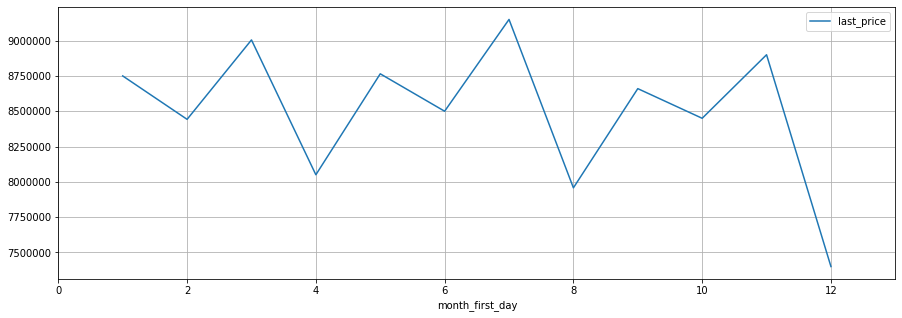

In [52]:
#зависимость цены от месяца публикации объявления
month_price_center = data_spb_center[['month_first_day', 'last_price']].groupby(['month_first_day']).median().plot(grid=True, figsize=(15, 5), xlim=(0,13))

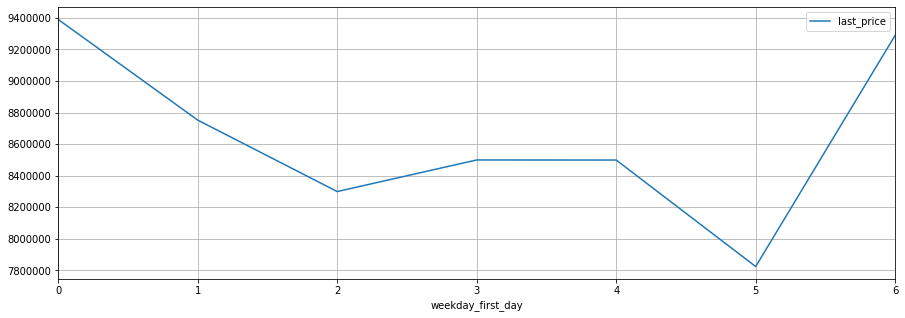

In [53]:
#зависимость цены от дня недели публикации объявления
weekday_price_center = data_spb_center[['weekday_first_day', 'last_price']].groupby(['weekday_first_day']).median().plot(grid=True, figsize=(15, 5), xlim=(0,6))

**Выводы:**

1. Зависимость стоимости квартиры сохранилась такой же, как и для всех объектов.
2. Стоимость квартир на первом и последнем этажах ниже, чем на всех остальных.
3. Самые дорогие квартиры в 2 километрах от центра, затем происходит спад и в 5 километрах цена снова поднимается.
4. В 2014г. квартиры были самые дорогие, до 2017г. стоимость квартир падала, затем начала расти.
5. В центре города дороже всего квартиры в марте, дешевле всего в мае.
6. В пятницу приобрести квартиру можно дешевле остальных дней, дороже всего в понедельник и воскресенье.

Выводы по центру города имеют, как общие черты, так и координальные отличия, такие как стоимость квартир по месяцам и дням недели.

## Общий вывод

В ходе работы:

1. Обработны пропущенные значения, заменены типы данных, а также обработаны дубликаты.
2. В таблицу добавлены необходимые параметры, такие, как стоимость квадратного метра квартиры, категория этажа, и соотношение кухни и жилой площади к общей.
3. Проведены исследования зависимости стоимости квартиры от ее параметров - количество комнат, этаж, высота потолков, расположение. А также обнаружена зависимость стоимости квартиры от месяца и дня недели продажи.
4. Те же параметры выделены для Санкт-Петербурга. 

Параметры, позволяющие построить автоматизированную систему, которая отследит аномалии и мошеничество:

1. Общая площадь квартиры
2. Расстояние до центра города (центр города огранчен окружностью радиусом 9 км)
3. Количество комнат и этаж квартиры (квартиры на первых и послежних этажах стоят дешевле прочих)
4. Скорость продажи квартир (аномально маленькие сроки - меньше 40 дней)